# Data Profile
This high-level examination of the Criteo Sponsored Search Conversion Log Dataset was conducted as a first assessment of data quality, and to illuminate issues that must be addressed before advancing to the exploratory data analysis and modeling phases of the project. 

## Setup
### External Module Dependencies
For reproducibility and portability reasons, a conservative stance was taken to contain  the dependence on third party packages our dependence upon 3rd party packages the tool chain below was selected to minimize exposure and dependence upon third party packages.  a conservative stance was taken to contain the exposure and dependence upon third party packages the tool chain was was selected to minimize use of third party packages was   dependencies on 3rd party packages 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
from IPython.display import display, HTML
pd.options.mode.chained_assignment = None  # default='warn'
#-----------------------------------------
from cvr.data.acquire import Acquire
from cvr.data.profile import DataProfiler
from cvr.data.outliers import OutlierDetector
from cvr.visuals.visualize import Visual
from cvr.data.datastore import DataStore
from cvr.data import numeric_columns, categorical_columns

## 1. Setup
Parameters and modules required for the data profiling process.
### 1.1. Parameters
The following parameters will control behavior throughout the data acquisition and profiling process.

In [2]:
url = "http://go.criteo.net/criteo-research-search-conversion.tar.gz"       # Source URL
sample_size = 0.01        # Proportion of data to sample
sep = "\t"                # Separator used in the source data 
random_state = 55         # Pseudo random number generator seed
version = 'dev'           # Version of data to use, either 'prod' for production or full set, or 'dev' development set.
stage = 'staged'          # The stage of the input data in the data processing pipeline
force_data = False        # If True force all downloads, and file processing to be performed overwriting cached values.
force_stats = True       # If True force all statistics computations to be performed overwriting cached values.

### 1.2. Compile Modules
Modules required for data access, visualization, outlier detection, and profiling

In [3]:
acquire = Acquire(url=url,sample_size=sample_size,        # Data Acquisition
                            sep=sep,
                            random_state=random_state)  

datastore = DataStore(stage=stage, version=version)                       # Data Access Object

viz = Visual(palette='vlag')                                     # Data Visualization Object

profiler = DataProfiler(datastore=datastore, visual=viz,                      # Data Profiler Object                          
                          stage=stage, 
                          version=version)   

INFO:cvr.data.acquire:Criteo Sponsored Search Conversion Log Dataset Acquisition.


## 2. Obtain Data
Let's obtain the data through a quasi extract, transform, load process (etl). The full data file is nearly 2G compressed; hence, a second smaller (1%) sample dataset is being created for experimentation purposes. In addition, a new timestamp and two datetime objects were added to both (full / sample) datasets. Specifically, the following variables were added for interpretability:
1. click_dt : The datetime object associated with the click time stamp.
2. sale_ts : The timestamp when the sale occurred if any
2. sale_dt: The datetime object when the sale occurred if any 

In [4]:
acquire.etl(force=force_data)

INFO:cvr.data.acquire:	Extract, transform, load process started at 2022-01-11 04:55:37.459025.
INFO:cvr.data.acquire:	Extract, transform, load process completed at 2022-01-11 04:55:37.462023. Duration: 0:00:00.002998


## 3. Dataset Overview
Our first step will outline the variables in the dataset, their types and definitions. 
### 3.0. Codebook

In [5]:
_ = profiler.codebook



                 Criteo Sponsored Search Conversion Log Dataset                 
                               Column Definitions                               
                 ______________________________________________                 
    Type           Column                 Datatype    Measure    Description
--  -------------  ---------------------  ----------  ---------  -----------------------------------------------------------------------------------------------------
 0  target         sale                   category    discrete   Indicates 1 if conversion occurred and 0 if not).
 1  target         sales_amount           float64     continous  Indicates the revenue obtained when a conversion took place. It is -1, when no conversion took place.
 2  target         conversion_time_delay  int64       continous  This indicates the time between click and conversion. It is -1, when no conversion took place.
 3  feature        click_ts               int64       continous  Time

The datatypes are summarized as follows:
- Category: Most product, audience, device, and user features are nominal and are being stored as category data types along with the sale variable within a pandas DataFrame. 
- Numeric: Price, sales amount, count and timestamp data are represented as integers and floats as noted.
- Datetime: We have two datetime objects to reference the click and conversion times (if a conversion occurred).


### 3.1. Summary
The summary attribute reveals the shape and size of the data.

In [6]:
_ = profiler.summary

INFO:cvr.data.profile:	Computing statistics for dev version of staged data started at 2022-01-11 04:55:41.037324.
INFO:cvr.data.profile:	Computed statistics for dev version of staged data completed at 2022-01-11 04:55:42.775888. Duration: 0:00:01.738564




                 Criteo Sponsored Search Conversion Log Dataset                 
                 ______________________________________________                 


                                    Overview                                    
                                    ________                                    
                                   Rows : 159,956
                                Columns : 26
                       Complete Samples : 0
                            Size Memory : 27,138,884


                                Basic Statistics                                
                                ________________                                
                                  Users : 159,603
                               Products : 80,264
                                 Clicks : 159,956
                            Conversions : 17,654
                        Conversion Rate : 11.04


                                    Missing                         

We have about 16m rows each with 23 columns plus the three time stamp an datetime objects created for a total of 26 variables. Conversions constitute about 10% of the click activity and nearly half of the data are categorized as missing. The dates appear to be within the advertised 90 day date range. 

### 3.2. Data Observations
Let's take a peak at a few samples from the dataset.

In [13]:
_= profiler.sample(n=5, random_state=random_state)



                 Criteo Sponsored Search Conversion Log Dataset                 
                                 Random Samples                                 
                 ______________________________________________                 
                             sale : 0
                     sales_amount : nan
            conversion_time_delay : nan
                         click_ts : 1,602,229,832
                   n_clicks_1week : 166.0
                    product_price : 0.0
                product_age_group : 4C90FD52FC53D2C1C205844CB69575AB
                      device_type : 7E56C27BFF0305E788DA55A029EC4988
                      audience_id : A1A6C5AF8D003B678EE69A13D244D436
                   product_gender : A5D15FC386510762EC0DDFF54ABE6F94
                    product_brand : 36002328382BF8B1BE52254A56827D2F
               product_category_1 : 88CED8BA3AA711A20ACF8B1FC574F218
               product_category_2 : B0D05C25C172D0737F04EF0AF0663D28
               product

### 3.2. Numeric Variables
#### 3.2.1. Numeric Variables Descriptive Statistics
The following will give us a sense of the center, range, and variation of the numeric data.

In [7]:
_ = profiler.describe_numerics()



                 Criteo Sponsored Search Conversion Log Dataset                 
                    Descriptive Statistics Numeric Variables                    
                 ______________________________________________                 
    Column                 Datatype       Size    Count              Mean          Min            25%             50%               75%              Max
--  ---------------------  ----------  -------  -------  ----------------  -----------  -------------  --------------  ----------------  ---------------
 0  sales_amount           float64     1279648    17654     113.934        0             23.4289         52               121.761         7486.13
 1  conversion_time_delay  float64     1279648    17591  321675            9            659            3476            351417                2.57944e+06
 2  click_ts               int64       1279648   159956       1.60054e+09  1.59644e+09    1.5986e+09      1.60066e+09       1.60251e+09      1.6043e+0

We notice varying degrees of right skew in the numeric data. The clicks_ts appear nearly flat with slight increase approaching the right end of the distribution.  Perhaps the most extreme case of a right-tailed distribution is observed amont the conversion_time_delay values. Product price and sales_amount exhibit right-skew endemic in financial variable distributions. Let's take a closer, more graphical take at this values.

#### 3.2.2. Numeric Variables Histograms

In [8]:
_ = profiler.plot_numerics()

We see long right tales in the sales_amount, product_price, conversion_time_delays and n_clicks_1week variables. A transformation may be an appropriate treatment to bring the data closer to a recognizable normal distribution to support multidimensional statistical inference. The timestamps; on the other hand, exhibit behavior closer to a uniform distribution.  Let's take a look at the categorical variables.
### 3.3. Categorical Variables


In [9]:
profiler.describe_categoricals()



                 Criteo Sponsored Search Conversion Log Dataset                 
                  Descriptive Statistics Categorical Variables                  
                 ______________________________________________                 
    Column              Datatype        Size    Count    Unique    Uniqueness    Freq        Freq %  Top
--  ------------------  ----------  --------  -------  --------  ------------  ------  ------------  --------------------------------
 0  sale                category      160080   159956         2          0     142302  88.9632       0
 1  product_age_group   category      161146    42605        10          0.01   32775  20.49         4C90FD52FC53D2C1C205844CB69575AB
 2  device_type         category      160573   159916         5          0      88282  55.1914       7E56C27BFF0305E788DA55A029EC4988
 3  audience_id         category      966646    45229      5782          3.61    1417   0.885869     ACEBB1033A0E853C11470868111DCD10
 4  product

All categorical variables have been hashed, as part of the process of making this benchmark dataset available; yet, we can begin to think about how the frequency distributions might shape downstream feature selection and perhaps dimension reduction and clustering efforts. Features might be grouped in terms of:
- Relative Count: user_id, product_title, product_brand, and certain product_category fields
- Unique Count and Cardinality: device_type vs product_id
- Top Frequency and Frequency Percentage: device_type vs product_category_7

The following frequency plots will provide a bit of illumination.

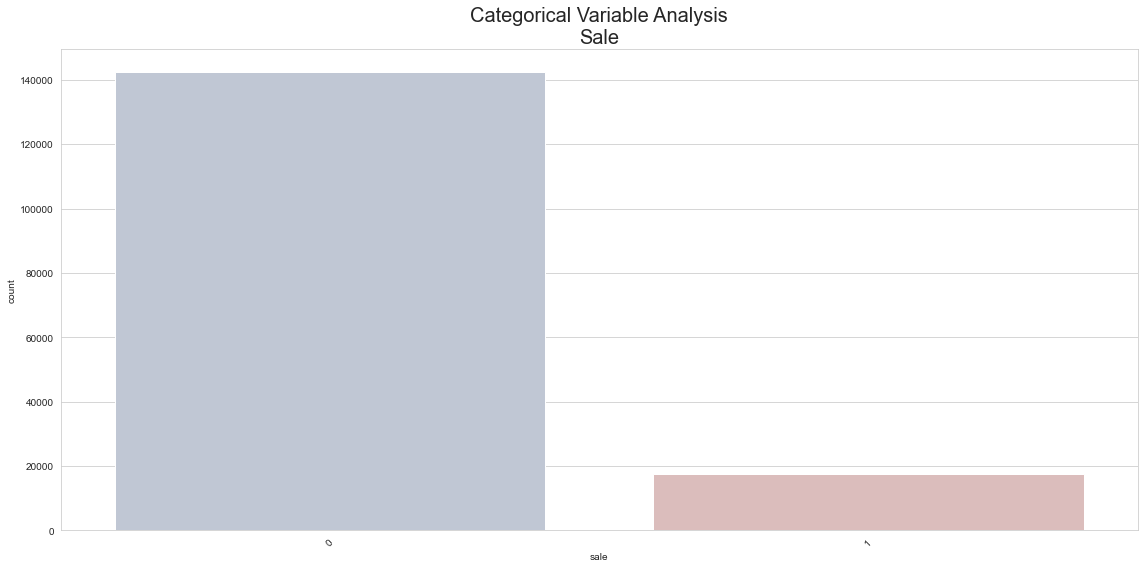

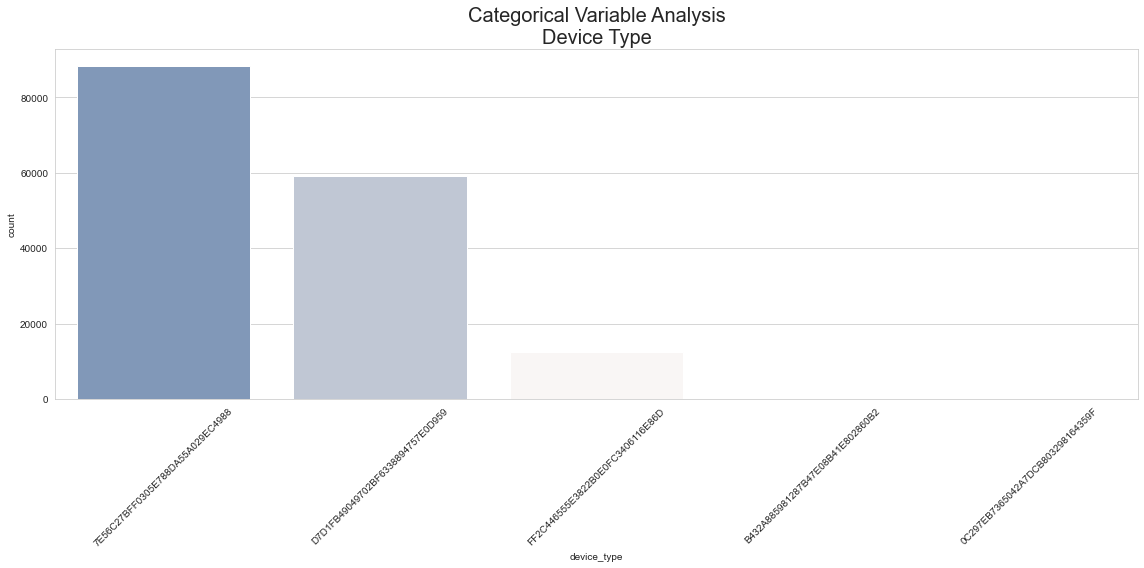

INFO:cvr.visuals.visualize:Output truncated at 20 columns


INFO:cvr.visuals.visualize:Output truncated at 20 columns


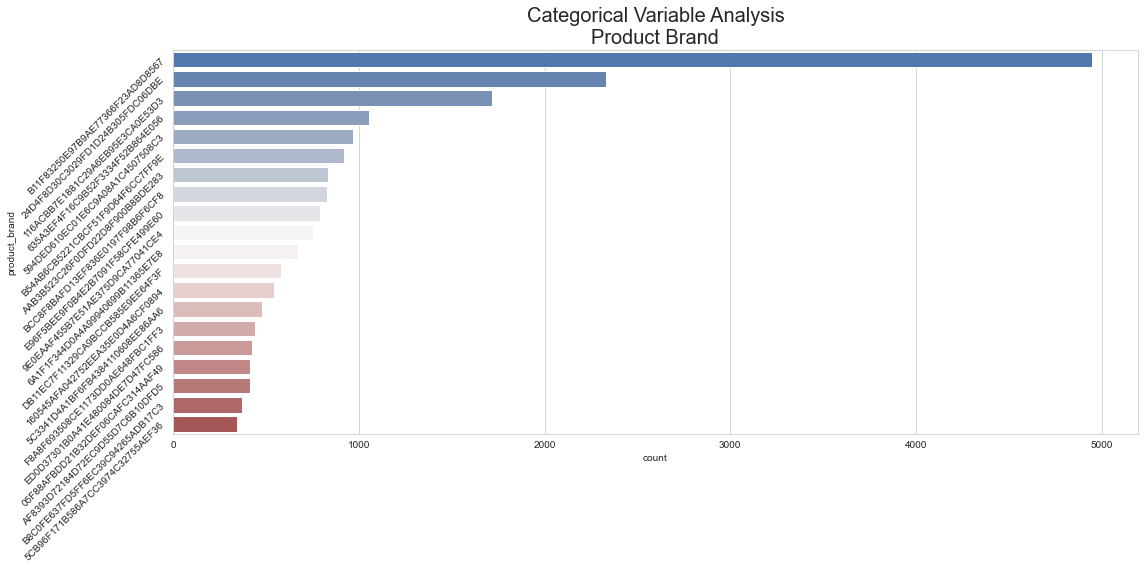

INFO:cvr.visuals.visualize:Output truncated at 20 columns


INFO:cvr.visuals.visualize:Output truncated at 20 columns


INFO:cvr.visuals.visualize:Output truncated at 20 columns


INFO:cvr.visuals.visualize:Output truncated at 20 columns


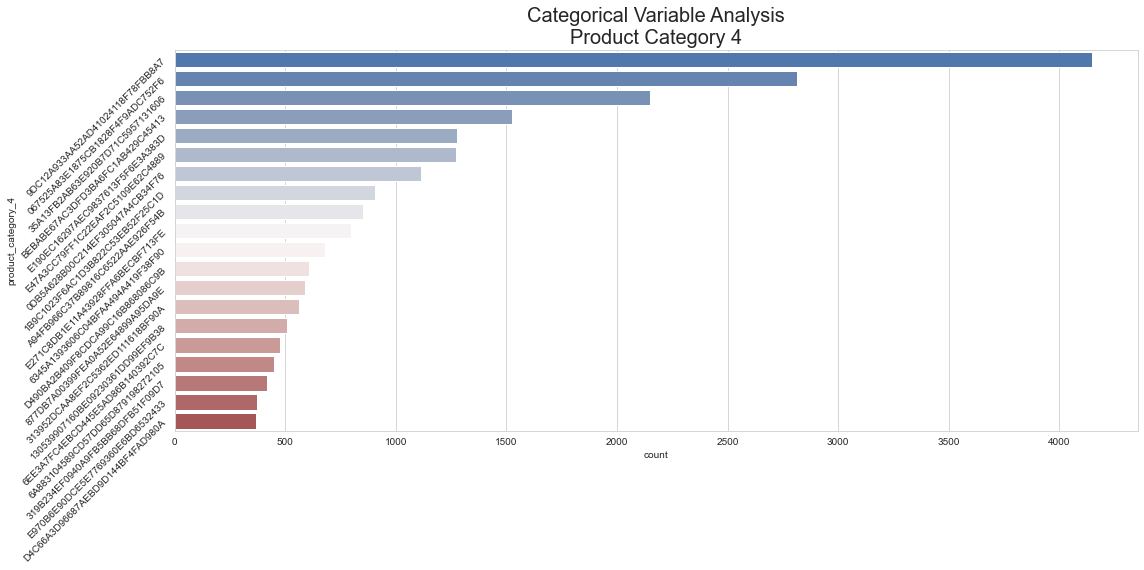

INFO:cvr.visuals.visualize:Output truncated at 20 columns


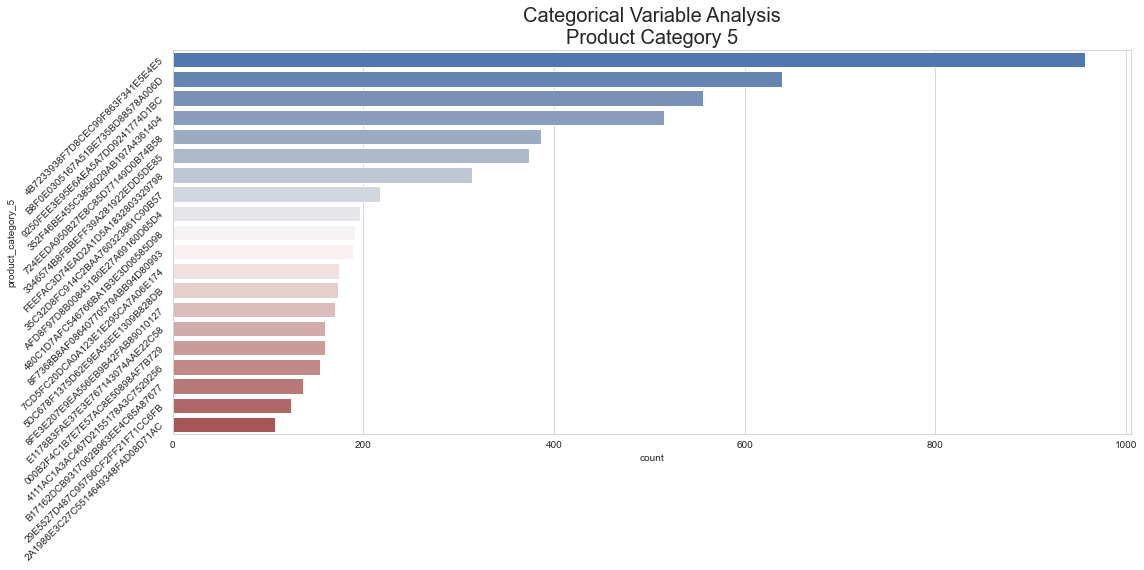

INFO:cvr.visuals.visualize:Output truncated at 20 columns


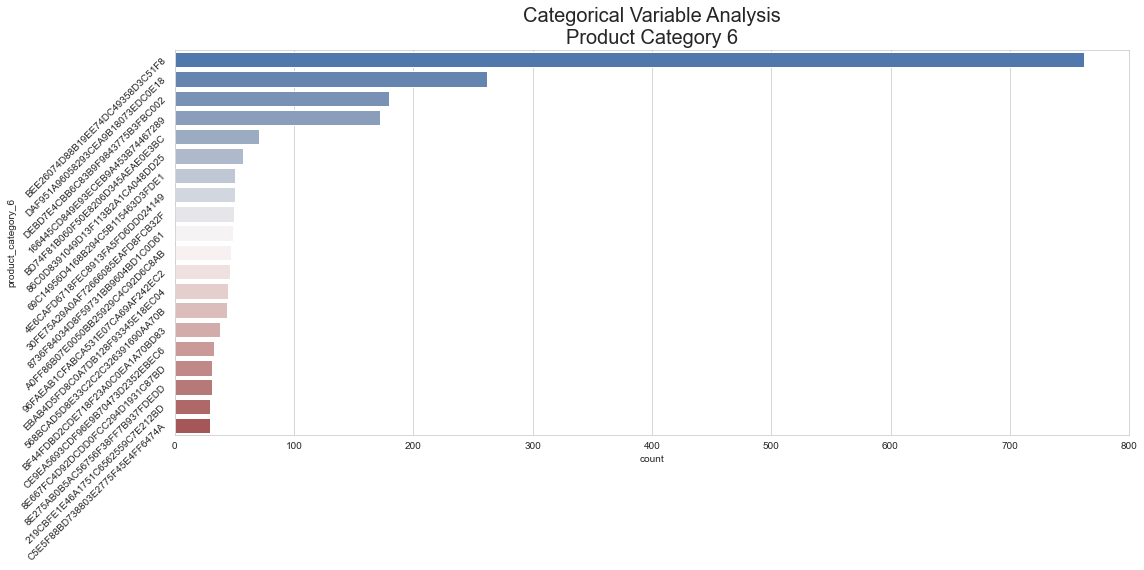

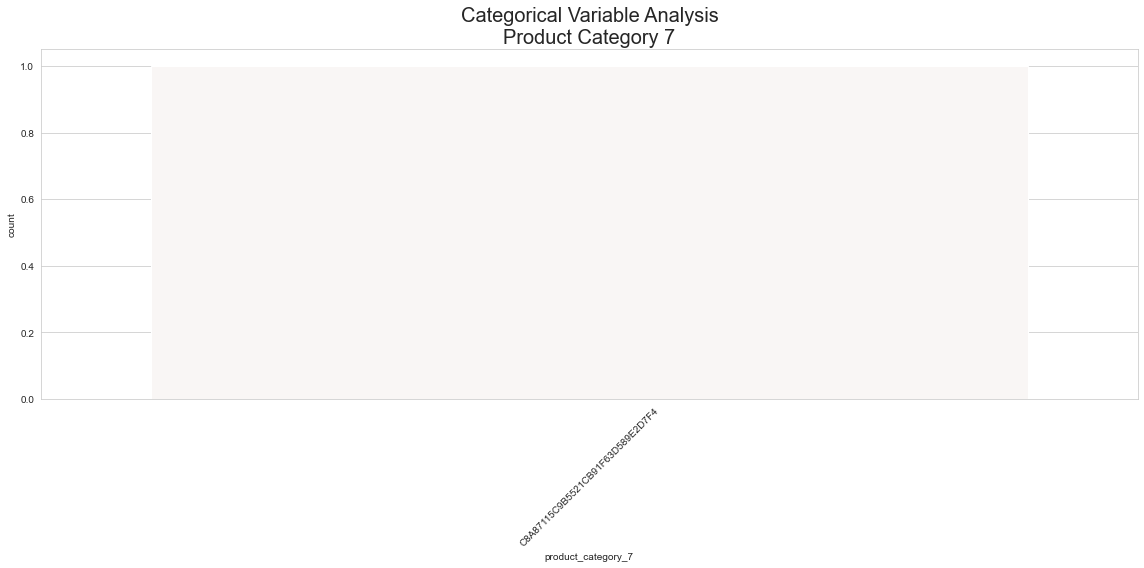

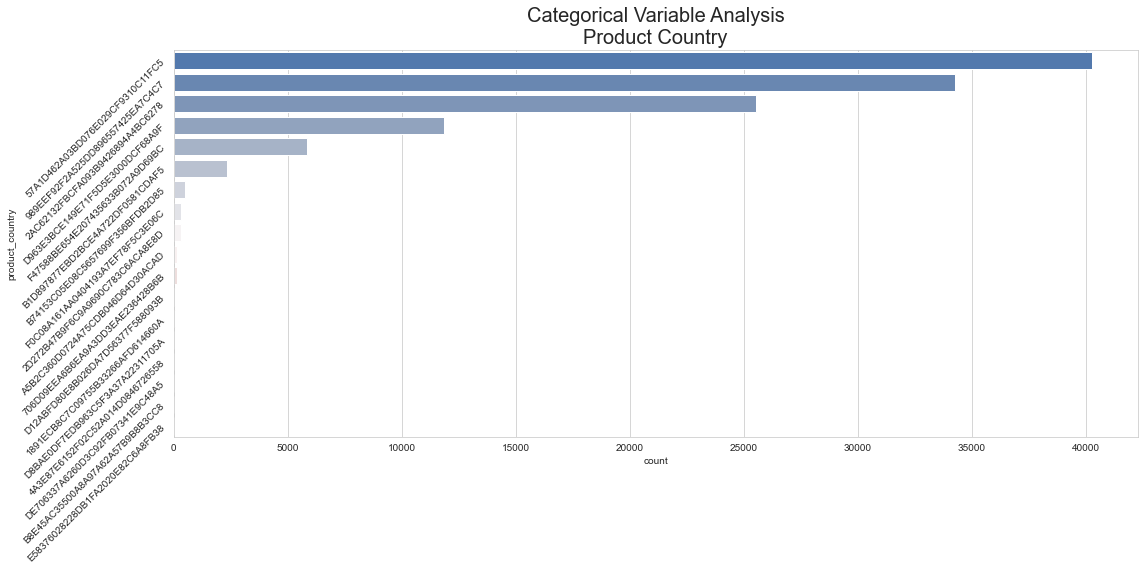

INFO:cvr.visuals.visualize:Output truncated at 20 columns


INFO:cvr.visuals.visualize:Truncated product_title to first segment.
INFO:cvr.visuals.visualize:Output truncated at 20 columns


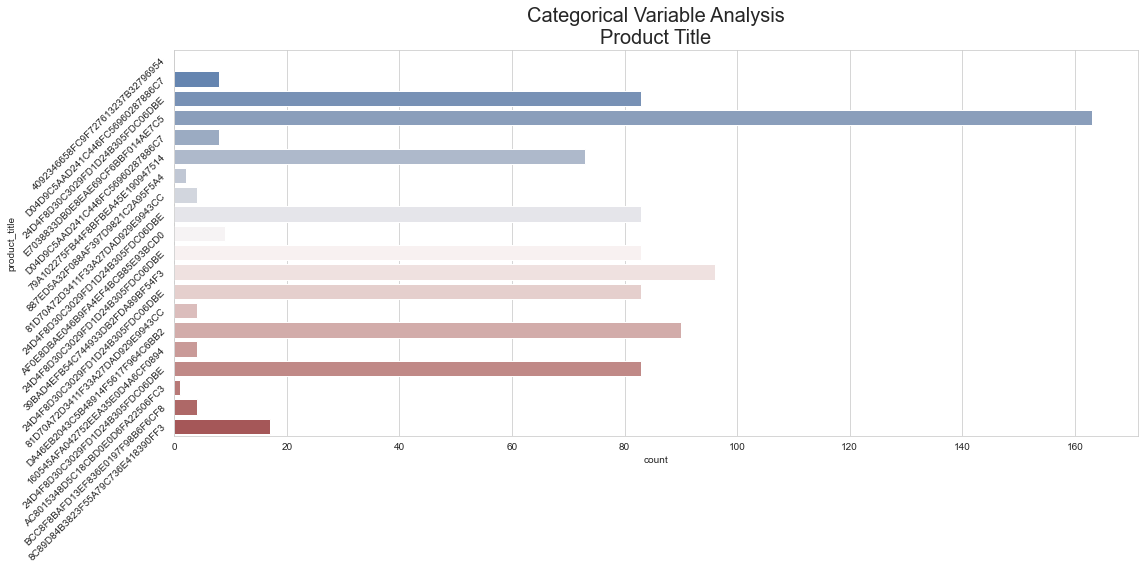

INFO:cvr.visuals.visualize:Output truncated at 20 columns


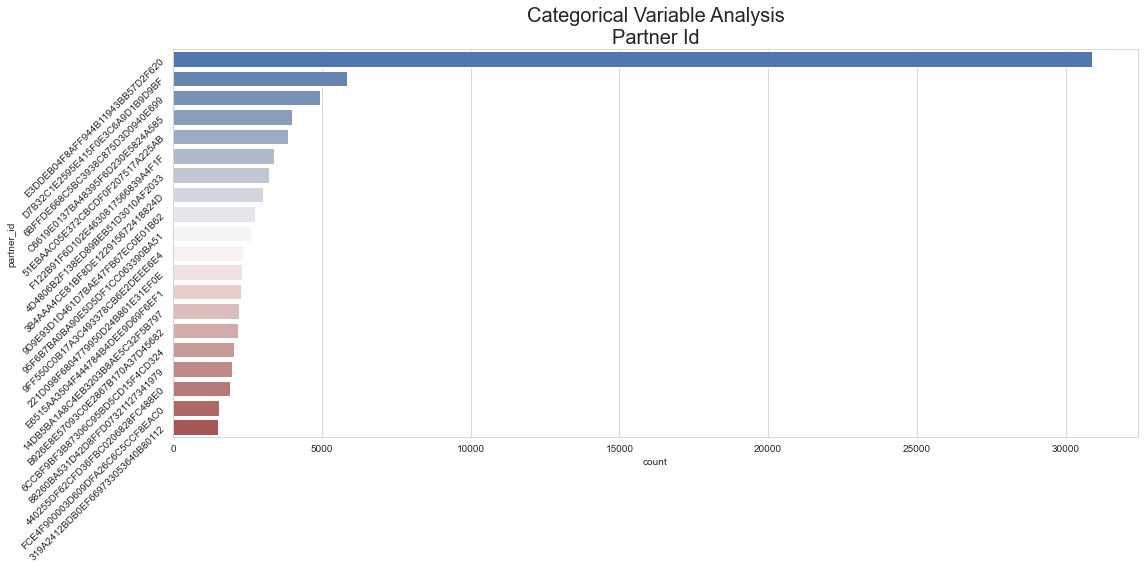

INFO:cvr.visuals.visualize:Output truncated at 20 columns


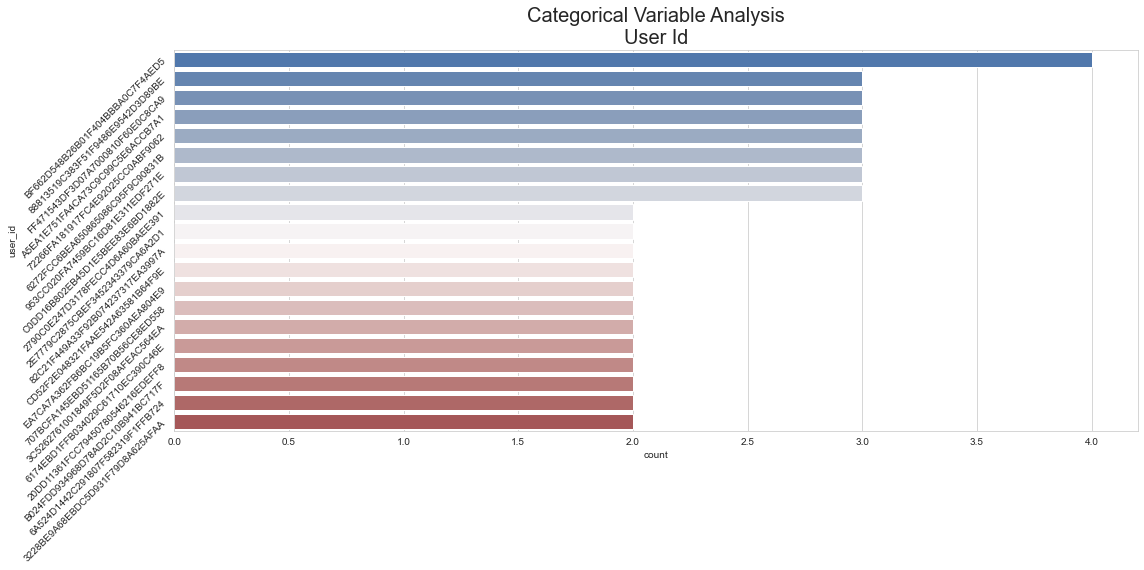

In [10]:
profiler.plot_categoricals()

### 3.4. Missing Values
Approximately 45% of the data are missing.

In [11]:
profiler.missing



                 Criteo Sponsored Search Conversion Log Dataset                 
                                Missing Analysis                                
                 ______________________________________________                 


                                    Summary                                     
                                    _______                                     
                                  Cells : 4,158,856
                                Missing : 1,675,407
                            MissingNess : 40.29


    Column                   Count    Unique    Uniqueness    Missing    Missingness
--  ---------------------  -------  --------  ------------  ---------  -------------
 0  sales_amount             17654     13367          8.36     142302          88.96
 1  conversion_time_delay    17591     11182          6.99     142365          89
 2  click_ts                159956    158062         98.82          0           0
 3  n_clicks_1week

Missing sales amounts and conversion delays correspond with the conversion rate of about 10%; however, the product categories constitute the most of the missingness observed. Missing product gender values may reflect to lack of gender identity in the product space, or it may indicate data that are indeed missing. Nothing in these data advance or inform any imputation strategies for the categorical variables. As we move into the data processing and exploration stages, we may discover reasoned patterns that suggest certain treatments. 

## 4.0 Data Profile Summmary
Of the 20 features and 3 targets, the numeric data have the greatest representatation. Transformations may bring price, and count data into alignment with normality, linearity, and heteroskedasticity required by frequentist statistical inference. 

During this data profile phase, data manipulation has been restricted; however, in the next phase we perform data preprocessing in preparation for the exploratory phase of this study.

Values for sales_amount are only available for conversions. Several product category variables are over 90% missing.

In [ ]:
for variable in categorical_columns:
    _ = profiler.analyze(variable)

## 4.0 Data Profile Summary
The Criteo Sponsored Search Conversion Log Dataset has over 16m observations, 17 categorical features, three numeric features, and three target variables. Approximately 45% of the dataset are missing values, most concentrated among the product category features. No imputation strategies for missing values stand out as of yet.

The numeric variables have the greatest representation. The price, sales_amount and count data may benefit from transformation in the next phase as we prepare the data for further inference, and modeling in the stage.